# Names
- Jackson Paull
- Josh Dao
- Jhanvi Girish

# Problem 1 - Jhanvi

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independant Gaussian with mean 10 and standard deviation 5.

(a) Take the sum of these two Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
(b) Estimate the mean and the variance of the sum.

Part a: The resulting histogram also seems to be normal centered around 0. This is not surprising as the intial two Gaussians were centered around 10 and -10, respectively; their sum would average to the middle (0).

Part b:
Estimated mean is 0.10. 
Estimated variance is 48.03.


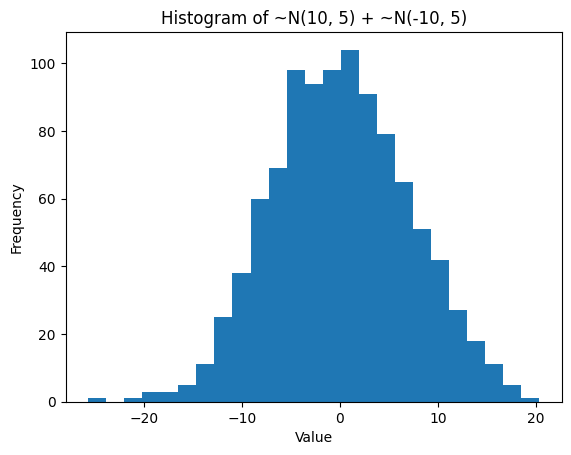

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import decimal as d

def plot_sum (normal1, normal2):
    sum = np.add(normal1, normal2)
    plt.hist(sum, bins = 25)
    plt.title("Histogram of ~N(10, 5) + ~N(-10, 5)")
    plt.ylabel("Frequency")
    plt.xlabel("Value")
    return sum

def variance (sum_data, mean):
    n = len(sum_data) - 1
    sum_dev = 0
    for x in sum_data:
        sum_dev += ((x - mean) ** 2)
    ans = sum_dev / n
    return ans

gaussian_1 = np.random.normal(loc = -10, scale = 5, size = 1000)
gaussian_2 = np.random.normal(loc = 10, scale = 5, size = 1000)

# Part a: Plot sum of two Gaussians
joint_distribution = plot_sum(gaussian_1, gaussian_2)

print("Part a: The resulting histogram also seems to be normal centered around 0. This is not surprising as the intial two Gaussians were centered around 10 and -10, respectively; their sum would average to the middle (0).")

# Part b: Estimate the mean and variance of the sum.
mean = np.sum(joint_distribution)/ len(joint_distribution)
data_var = variance(joint_distribution, mean)

print("\nPart b:\nEstimated mean is {first}. \nEstimated variance is {second}.".format(first=d.Decimal(mean).quantize(d.Decimal('.01'), rounding=d.ROUND_DOWN), second=d.Decimal(data_var).quantize(d.Decimal('.01'), rounding=d.ROUND_DOWN)))

# Problem 2 - Jackson

Central Limit Theorem.
Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable Zn = 1√n
∑Xi. By taking 1000 draws from Zn, plot its histogram. Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but
when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian.
Check also for much bigger n: n = 250, to see that at this point, one can really see the bell
curve.

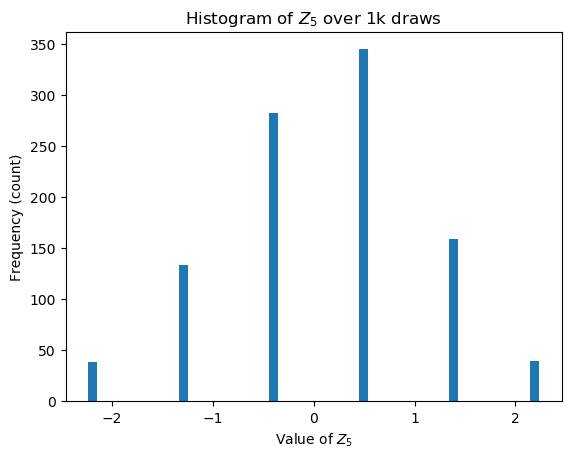

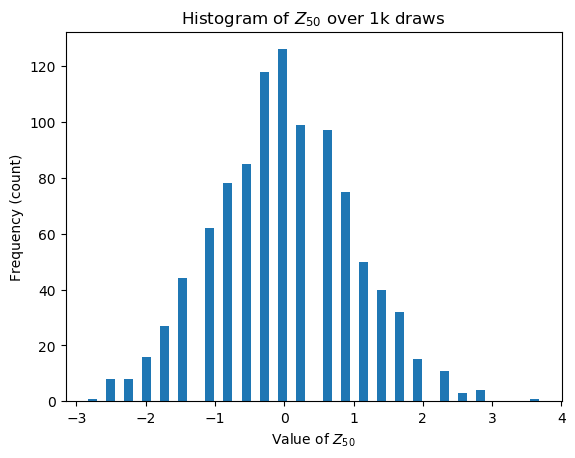

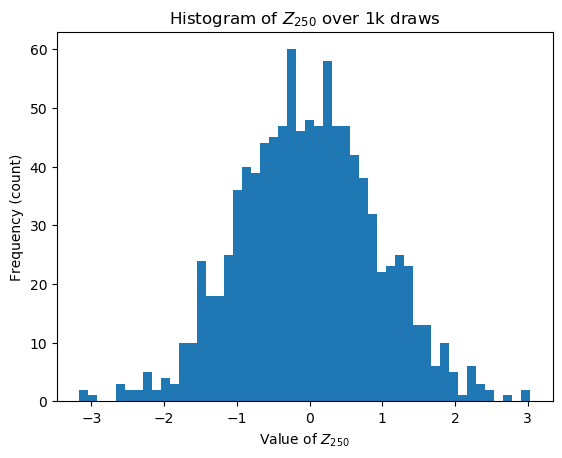

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

def bernouli(p = 0.5) -> int:
    # Return 1 w.p. p, and -1 w.p. (1-p)
    if random.random() < p:
        return 1
    return -1

def Z(n: int, p = 0.5) -> int:
    # Return a value of Zn, given n and p
    total = 0
    for i in range(n):
        total += bernouli(p)
    
    return total/math.sqrt(n)

def plot_histogram(n: int, p = 0.5):
    data = []
    for i in range(1000):
        z = Z(n, p)
        data.append(z)
    plt.hist(data, bins=50)
    plt.title('Histogram of $Z_{%d}$ over 1k draws' %(n))
    plt.ylabel('Frequency (count)')
    plt.xlabel('Value of $Z_{%d}$'%(n))
    plt.show()
    return data

# Part a. --- Histogram for small n
data_a = plot_histogram(5)

# Part b. --- Histogram for midrange n
data_b = plot_histogram(50)

# Part c. --- Histogram frr large n
data_c = plot_histogram(250) #Bell Curve clearly visible

# Problem 3 - Jackson

Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [ ]:
def problem_3(mean, std, n):
    data = np.random.normal(scale = 5, size = 25000)

    # Part a -- Estimate Mean
    mean = np.sum(data)/len(data)

    # Part b -- Estimate std dev
    std = math.sqrt(np.sum((data - mean) ** 2) / 25000)

    print(f'Given {n} samples from a normal distriution, we estimate\n\tMean: {mean:0.2f}\n\tStd : {std:0.2f}')
    return (mean, std)


mean, std = problem_3(0, 5, 25000)

# Problem 4 - Jhanvi
Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution
                       | Xi |  ~ N ( | -5 |   | 20   0.8 |
                       | Yi |        |  5 | , | 0.8  30  | )
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).


In [89]:
import numpy as np
import matplotlib.pyplot as plt

def covariance_estimator(x, y, mean_x, mean_y):
    x_cent = [0 for x in range(len(x))]
    y_cent = [0 for y in range(len(y))]
    i = 0
    for pt in x:
        x_cent[i] = (pt - mean_x)
        i += 1
    i = 0
    for pt in y:
        y_cent[i] = (pt - mean_y)
        i += 1

    d_cent = np.column_stack((x_cent, y_cent))
    d_cent_t = np.transpose(d_cent)
    inverse_n = 1 / (len(d_cent) - 1)
    return (np.matmul(d_cent_t, d_cent)) * inverse_n

mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

#plt.plot(x, y, '.')

# Estimate the mean
mean_x = np.sum(x) / len(x)
mean_y = np.sum(y) / len(y)

mean_est = [mean_x, mean_y]
print("The estimated mean is", mean_est)

# Estimate the covariance
covariance_est = covariance_estimator(x, y, mean_x, mean_y)
print("The estimated covariance matrix is", covariance_est)

The estimated mean is [-5.058022776683509, 5.052036112564917]
The estimated covariance matrix is [[19.99725712  0.91625404]
 [ 0.91625404 29.81989724]]


# Problem 5

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv(r"C:\Users\Joshd\Downloads\PatientData.csv") #read csv
data.head() #view top 5 entries in csv

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


# How many patients and how many features are there?

In [116]:
print(data.count())

75       451
0        451
190      451
80       451
91       451
        ... 
0.9.2    451
2.9.1    451
23.3     451
49.4     451
8        451
Length: 280, dtype: int64


**There are 280 features and 451 patients.**

# What is the meaning of the first 4 features? See if you can understand what they mean.

<AxesSubplot:title={'center':'Feature 1'}, xlabel='75', ylabel='Count'>

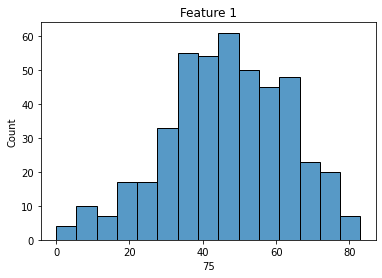

In [117]:
plt.title("Feature 1")
sns.histplot(data.iloc[:,0])

Looking at this distrubtion, we can see that the range of the data is between 0 to 85 and the mean is around 50.  This feature must therefore be Age.

<AxesSubplot:title={'center':'Feature 2'}, xlabel='0', ylabel='count'>

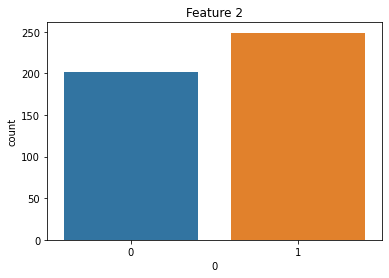

In [118]:
plt.title("Feature 2")
sns.countplot(x=data.iloc[:,1])

Being a binary classifer with there being only 2 options (0 and 1), this feature must indicate some sort of trait or status that only has 2 options.  The most logical choice would be the gender/sex of the patient.

<AxesSubplot:title={'center':'Feature 3'}, xlabel='190', ylabel='Count'>

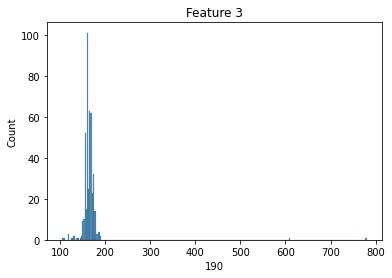

In [119]:
plt.title("Feature 3")
sns.histplot(data.iloc[:,2])

Looking at this histogram, the range of the dataset is between 100 to a little under 200 with a mean of about 150.  This feature most likely indicates the height of the patient in cm.  Furthermore, we can see that there are 2 outliers in the data at around 600 and 800. However looking at the features for these 2 patients, we can see that these 2 entries are most likely mistakes since it is almost impossible for there to be a 1 year old female with a height of 780cm or 25.6ft.  Therefore we can disregard these two entires since they are likely noise. 

<AxesSubplot:title={'center':'Feature 4'}, xlabel='80', ylabel='Count'>

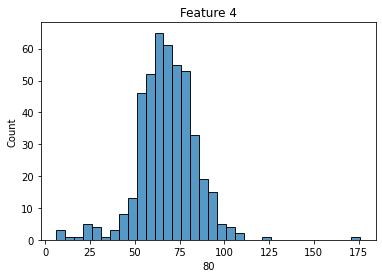

In [120]:
plt.title("Feature 4")
sns.histplot(data.iloc[:,3])

This feature has a range of a little above 0 to 175 with a mean of roughly 70.  This feature most likely depicts the patients weight in kilograms.

**Looking at the charts and distribution for each feature, the first 4 features are most likely Age, Sex, Weight, and Height.**

# Are there missing values? Replace them with the average of the corresponding feature column


In [121]:
data.iloc[:,[13,14]] = data.iloc[:,[13,14]].apply(pd.to_numeric,errors='coerce') #Change dtype from object to float in order to use mean()
data.iloc[:,13].replace(np.NaN, data.iloc[:,13].mean() ,inplace=True)  #Replace all NaN (Not a number) with mean
data.iloc[:,14].replace(np.NaN, data.iloc[:,14].mean() ,inplace=True)
print(data.iloc[:,13])
print("\n")
print(data.iloc[:,14])


0      -13.592105
1       23.000000
2      -13.592105
3      -13.592105
4      -13.592105
          ...    
446    -13.592105
447    -13.592105
448     84.000000
449    103.000000
450    -13.592105
Name: ?, Length: 451, dtype: float64


0      53.000000
1      75.000000
2      71.000000
3      74.488889
4      84.000000
         ...    
446    63.000000
447    73.000000
448    84.000000
449    80.000000
450    75.000000
Name: 63, Length: 451, dtype: float64


# How could you test which features strongly influence the patient condition and which do not?


We can plot each feature and see which have a strong correlation to each other. Any feature that has little to no correlation to any other features can be discarded in our training set.

<AxesSubplot:xlabel='75', ylabel='80'>

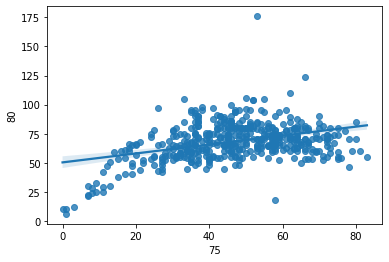

In [122]:
sns.regplot(x=data.iloc[:,0], y=data.iloc[:,3])

For example after plotting the 1st and 4th feature, we can see there is a positive correlation between age and height.  Therefore we should keep these features.

The 3 most important features I belive are Age, Weight, and Height